## Analysis of Ad-Hoc Communications Network

### 1. Problem restatement
We have been asked to help with planning an ad-hoc communications network over a large rectangular region. Each individual tower can monitor a rectangular subsection of a specific width and height. The main problem is that none of the individual towers can provide coverage for the entire region of interest. There can be no overlap between any pair of rectangular subsections provided by the two respective towers. In any case, the desire is to maximize the coverage area of any available communications tower.

##### We assumed
* All rectangular sections have integer-based corners.
* All rectangular sections must be contained in the overall rectangular footprint.
* The height and width of each rectangular section is sampled from a uniform distribution.
* Positions of the windows are also determined by uniform random distribution.
* All footprints must be rectangles (not general polygons).
* When a new tower comes online, if its coverage rectangle intersects the pre-existing composite footprint, then that new tower\'s coverage is trimmed such that its maximum remaining coverage area is retained 

### 2. Algorithms Design Analysis

At first, a data structure to describe coverage state should be given. Based on integer-based assumption, we divide the the whole rectangular field (e.g. m by n) into unit squares with area of 1. After that, a 0-1 matrix (m by n size) can be built up to describe its coverage state in such form: if a unit square in field is covered by existed communication tower, the corresponding item in our matrix will set to 1. To be more specific, the index of corresponding item in matrix share same the value with the coordinate of left lower corner of that unit square. After that, a coverage state can always be recorded by that matrix. By taking any part of that matrix, we can obtain the information about communication tower coverage of that part. 

Here is an example of such matrix:
$$\left[ \begin{array}{cccc}
1 & 0 & \ldots & 1 \\
1 & 1 & \ldots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \ldots & 0\\ \end{array} \right]$$
Initially, the matrix should be an all-zero. It will approach to all-one as number of towers increasing. Also, it is worth to mention that: if an sub-area is not occupied by any other towers, it should be all-zero in its corresponding matrix part.

The key point of this problem is to find a way to trim out maximum cover area of new tower coming online. By making use of that matrix, our goal then becomes as: 
search for maximum rectangular all-zero shape within a given area (new tower coming online) and given coverage state (combination of all previous tower states)
##### Based on above analysis, we can design our algorithm as:
1. Generate a random rectangular shape, with its position, width and height all sampled from uniform distribution (position is defined as coordinate of left lower corner);
2. Acoording to its position and shape information, update information in that 0-1 matrix;
3. Generate another new random rectangle with same sample way;
4. Check the coverage 0-1 matrix related with that new rectangle, take 0-1 information from that area, and find the maximum all-0 rectangular shape in that area. It can be the whole area if it is not taken by any other towers or part of the area but with a maximum trim;
5. Update coverage information of new online rectangle into the total large 0-1 matrix.
6. Repeat from 3 to 5 until the fully coverage is realized or run out of given commnication towers.

More detailed desciption can be as following:
if there is a new generated rectangle with left lower corner coordinates of (2,1), width =4 and height =4. Then we can take out coverage information of that area from whole coverage matrix as following A matrix (indexes will denote which part we take out). Until now, we have no idea how to do the trim operation. Recall simple rule from linear algebra, if we have a row vector such as $\left[ \begin{array}{cccc} 1 & 1 & 0 & 0 \\ \end{array} \right]$  and a column vector such as $\left[ \begin{array}{cccc} 0 & 1 & 1 & 0 \\ \end{array} \right]$<sup>T</sup>, by applying following matrix multiplication, we can get the summation of  A22 + A23 + A32 + A33. Furthermore, if this value is zero, we will know this rectangular part is not taken by any other towers. If not, we need to find another option by adjust those two vectors. 

<center>sum = $\left[ \begin{array}{cccc}
1 & 1 & 0 & 0 \\ \end{array} \right]$
$\left[ \begin{array}{cccc}
A_{21} & A_{22} & A_{23} & A_{24} \\
A_{31} & A_{32} & A_{33} & A_{34} \\
A_{41} & A_{42} & A_{43} & A_{44} \\
A_{51} & A_{52} & A_{53} & A_{54} \\ \end{array} \right]$
$\left[ \begin{array}{cccc}
0 \\
1 \\
1 \\
0 \\ \end{array} \right]$</center>

Finally we could loop in such a way until we find a maximum all-0 area in that A matrix. There will be many technical details to increase this loop speed, but it will be too tedious to fully explain them here. 


### 3. Script: 
### 3.1 the script to realize aforementioned algorithm is shown as following:

The following several cells provide all modules and functions that will be used when analyze specific problem, all of functions are packaged here.

In [5]:
%matplotlib inline 
# Important magic line that will guarantee plt.show() work properly
# import all modules we may need 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as axes
import datetime
import numpy as np

In [6]:
# Function blocks
import numpy as np
def window_generator(field_size_x, field_size_y):
    #import numpy.random.uniform as unif
    '''Generate position, width and height of rectangular window, 
    within given field size, sampled from uniform distribution
    Position is defined as coordinate of left lower corner'''
    assert(isinstance(field_size_x,int))
    assert(field_size_x > 0)
    assert(isinstance(field_size_y,int))
    assert(field_size_y > 0)
    width = int(np.random.uniform(1,field_size_x,1))
    height = int(np.random.uniform(1,field_size_y,1))
    # (position_x, position_y) is set as left bottom corner of rectangular window 
    position_x = int(np.random.uniform(0,field_size_x,1))
    position_y= int(np.random.uniform(0,field_size_y,1))
    width = min(width, field_size_x- position_x )
    height = min(height, field_size_y- position_y )
    return width, height, position_x, position_y
        
    
def write_occupation(width, height, position_x, position_y, Occupation_matrix,field_size_x, field_size_y):
    '''This function is used to record occupied area into a 0-1 matrixs'''
    assert(isinstance(width,int))
    assert(width > 0)
    assert(isinstance(height,int))
    assert(height > 0)
    assert(isinstance(position_x,int))
    assert(position_x >= 0)
    assert(isinstance(position_y,int))
    assert(position_y >= 0)
    assert(isinstance(field_size_x,int))
    assert(field_size_x > 0)
    assert(isinstance(field_size_y,int))
    assert(field_size_y > 0)
    left_bottom_corner = (position_x,position_y)
    right_top_corner = (min(position_x+width,field_size_x),min(position_y+height,field_size_y))
    for i in range(left_bottom_corner[0],right_top_corner[0],1):
        for j in range(left_bottom_corner[1],right_top_corner[1],1):
            Occupation_matrix[i][j] = 1
            
            
def reduceNum (n):
    '''This function is used to generate all possible combination pairs
    when dividing an integer into 2 factors, according to our integer 
    assumption, area of a rectangle can only be an integer, its width
    and length can only be integer also'''
    n = int(n)
    pairs = [];
    for i in range(1,n+1,1):
        if n%i == 0:
            pairs.append((i,n//i)) # // to divide by integer
    return pairs

def trim_func(width_1, height_1, position_x_1, position_y_1, Occupation_matrix):
    '''This function will take trial rectangle position and its shape can give back
    the information of rectangle after trim operation based on occupation matrix'''
    assert(isinstance(width_1,int))
    assert(width_1 > 0)
    assert(isinstance(height_1,int))
    assert(height_1 > 0)
    assert(isinstance(position_x_1,int))
    assert(position_x_1 >= 0)
    assert(isinstance(position_y_1,int))
    assert(position_y_1 >= 0)
    
    ######## Take out information from Occupation matrix for occupation trial
    left_bottom_corner_1 = (position_x_1,position_y_1)
    right_top_corner_1 = (min(position_x_1+width_1,field_size_x),min(position_y_1+height_1,field_size_y))
    
    Sub_Occupation_Mat = np.zeros((right_top_corner_1[0]-left_bottom_corner_1[0],
                                   right_top_corner_1[1]-left_bottom_corner_1[1]))

    size_subarea = Sub_Occupation_Mat.shape
    for i in range(size_subarea[0]):
        for j in range(size_subarea[1]):
            Sub_Occupation_Mat[i][j] = Occupation_matrix[i+left_bottom_corner_1[0]][j+left_bottom_corner_1[1]]
    
    # initialize sieve vector to determine trim area
    x_sieve = np.ones((1,size_subarea[0])) #take out all rows
    y_sieve = np.ones((size_subarea[1],1)) # take out all columns

    position_check = np.dot(np.dot(x_sieve,Sub_Occupation_Mat),y_sieve)
    #print('position_check='+str(position_check[0][0]))

    ######## Test loop to see the optimal occupation method to maximum area

    if position_check[0][0] == 0.0:
        # if position_check == 0: this new area is not taken by any other window
        # fully occupation can happen here
        width_taken = width_1
        height_taken = height_1  
        position_x_taken = position_x_1
        position_y_taken = position_y_1
        #left_bottom_corner_taken = (position_x_taken,position_y_taken)
        #right_top_corner_taken = (min(position_x_taken+width_taken,field_size_x),
        #                          min(position_y_taken+height_taken,field_size_y))
        #write_occupation(left_bottom_corner_taken, right_top_corner_taken, Occupation_matrix)
        #write_occupation(width_taken, height_taken, position_x_taken, position_y_taken, Occupation_matrix)
    elif position_check[0][0] == size_subarea[0]*size_subarea[1]:
        # elseif position_check == size_subarea[0]*size_subarea[1]: this area is fully taken by others, no new occupation can happen
        # New window should be generated
        width_taken = 0
        height_taken = 0 
        position_x_taken = position_x_1
        position_y_taken = position_y_1
        # No new write can take place
    else:
        # else: loop to find optimal trim
        empty_area = size_subarea[0]*size_subarea[1] - position_check[0][0] 
        # maximum possible area which is not taken, but this do not need to be a rectangle
        
        occupy_fail_flag = 1
        attack_area = empty_area #initial trial rectangle area as its maximum possible value
        while (occupy_fail_flag and attack_area > 0) :
            possible_rect_dims = reduceNum (attack_area)
            attack_area -= 1 # Minus 1 for next loop
            # Find all possible pairs of this value to make a rectangle
            for rect_dim_pair in  possible_rect_dims:   
                if occupy_fail_flag == 0:
                            break # Break of for loop at this level
                if rect_dim_pair[0] > size_subarea[0] or rect_dim_pair[1] > size_subarea[1] :
                    # print('Dimension exceed maximum values')
                    # No action should be taken
                    pass
                else:
                    #print(rect_dim_pair)
                    #print('Dimension check pass')
                    for i in range(size_subarea[0]-rect_dim_pair[0]+1):
                        if occupy_fail_flag == 0:
                            break # Break of for loop at this level
                        x_sieve = np.zeros((1,size_subarea[0])) #take off all rows
                        for k in range(len(x_sieve[0])):
                            #print(k)
                            if k>=i and k<= i+rect_dim_pair[0]-1:
                                x_sieve[0][k] = 1.0
                        for j in range(size_subarea[1]-rect_dim_pair[1]+1):
                            y_sieve = np.zeros((size_subarea[1],1)) #take off all columns
                            for k in range(len(y_sieve)):
                                if k>=j and k<= j+rect_dim_pair[1]-1:
                                    y_sieve[k][0] = 1.0
                            #print(x_sieve)
                            #print(y_sieve)
                            position_check = np.dot(np.dot(x_sieve,Sub_Occupation_Mat),y_sieve) 
                            if position_check == 0:
                                #print('Occupation succeed')
                                width_taken = rect_dim_pair[0]
                                height_taken = rect_dim_pair[1] 
                                position_x_taken = position_x_1 + i
                                position_y_taken = position_y_1 + j
                                #left_bottom_corner_taken = (position_x_taken,position_y_taken)
                                #right_top_corner_taken = (min(position_x_taken+width_taken,field_size_x),min(position_y_taken+height_taken,field_size_y))
                                # Update occupation matrix
                                #write_occupation(width_taken, height_taken, position_x_taken, position_y_taken, Occupation_matrix)
                                #write_occupation(left_bottom_corner_taken, right_top_corner_taken, Occupation_matrix)
                                occupy_fail_flag = 0
                                break                               
            #END of big while loop
    return  width_taken, height_taken, position_x_taken, position_y_taken

In [7]:
def windows_generator(field_size_x, field_size_y, step_num):
    '''This is the main functional function, it will generate rectangle window series
    with given field size and number of communcation towers'''
    # field_size_x and field_size_y is used to set field size for the whole rectangular region 
    # step_num set total random window numbers that will be generated
    assert(isinstance(field_size_x,int))
    assert(field_size_x > 0)
    assert(isinstance(field_size_y,int))
    assert(field_size_y > 0)
    assert(isinstance(step_num,int))
    assert(step_num > 0)
    
    ##### Variables initailization #####
    Occupation_matrix = np.zeros((field_size_x,field_size_y))
    # Occupation_matrix will map occupation information to 0-1 matrix
    # Index of matrix stands for coordinate of left bottom corner of that unit square
    # If one unit square is occupied, matrix entry at that position will be 1
    # Initially, it should be an all-zero matrix
    rect_records = np.zeros((step_num+1,4))
    rect_records_untrimed = np.zeros((step_num+1,4))
    #These two vectors are used to record rectangle info before trim and after trim


    # Generate initial rectangular window
    width, height, position_x, position_y = window_generator(field_size_x, field_size_y)
    rect_records[0][:] = [width, height, position_x, position_y]  
    rect_records_untrimed[0][:] = [width, height, position_x, position_y] 
    # update occupation matrix
    write_occupation(width, height, position_x, position_y, 
                        Occupation_matrix,field_size_x, field_size_y)

    for i in range(step_num):
        # Generate new coming-in window
        stop_flag = 1
        while (stop_flag):
            # Variables with extra subscript 1 means new generated window
            width_1, height_1, position_x_1, position_y_1 = window_generator(field_size_x, field_size_y)
            # Trim new generated window if necessary
            width_taken, height_taken, position_x_taken, position_y_taken = trim_func(
                        width_1, height_1, position_x_1, position_y_1, Occupation_matrix)
            if width_taken * height_taken > 0: # Keep generating new windows until occupation can happen
                stop_flag = 0
        # Update occupation matrix
        write_occupation(width_taken, height_taken, position_x_taken, position_y_taken, 
                            Occupation_matrix, field_size_x, field_size_y)
        rect_records[i+1][:] = [width_taken, height_taken, position_x_taken, position_y_taken]
        # Record information about new window before trim happens
        rect_records_untrimed[i+1][:] = [width_1, height_1, position_x_1, position_y_1]

    return rect_records_untrimed, rect_records, Occupation_matrix

### 3.2 This part of code is specialized for question (1) and (2)

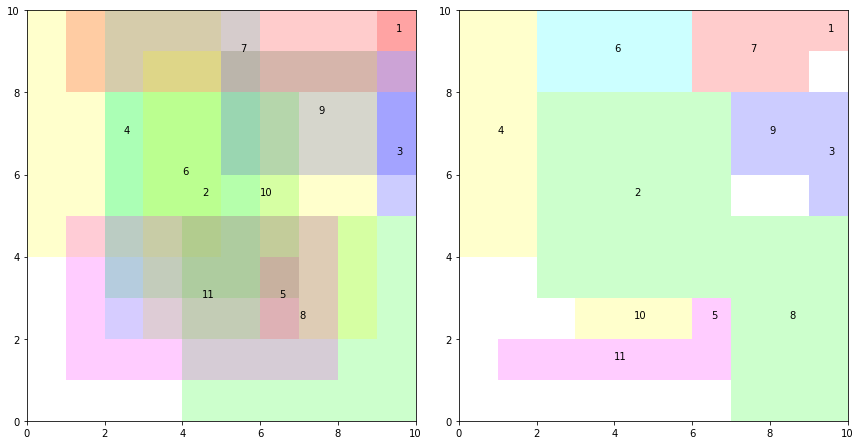

Desired coverage area of the original footprint in total is [[ 93.]]
Real coverage area of that footprint is [[ 84.]]


In [8]:
############################## (1) First question:  ################################
# Overall desired coverage footprint and a sequence of n communications towers
# Solve out its resulting resolved coverage
# Fixed field size at 10 by 10
field_size_x = 10 # Setting field size for the whole rectangular region
field_size_y = 10
step_num =10 # Set total window numbers that will show up
color_choices =[(1.0, 0.0, 0.0),(0.0, 1.0, 0.0),(0.0, 0.0, 1.0),(1.0, 1.0, 0.0),
               (1.0, 0.0, 1.0),(0.0, 1.0, 1.0)]
rect_records_untrimed, rect_records, Occupation_matrix = windows_generator(field_size_x, field_size_y, step_num)
fig1 = plt.figure(figsize=(12,6)) # Set figure size
ax1=fig1.add_axes([0., 0., 0.45, 0.95, ])
ax1.set_xlim([0,field_size_x]) 
ax1.set_ylim([0,field_size_y])
for i in range(step_num+1):
    ax1.add_patch(patches.Rectangle((rect_records_untrimed[i][2],rect_records_untrimed[i][3]),  
                                 rect_records_untrimed[i][0], rect_records_untrimed[i][1], 
                                      alpha =0.2,
                                      facecolor=color_choices[i%6],
                                      label = 'label',
                                     ))  
    plt.text(rect_records_untrimed[i][2]+rect_records_untrimed[i][0]/2, 
             rect_records_untrimed[i][3]+rect_records_untrimed[i][1]/2,
             str(i+1))
### Plot out resulting resolved coverage
ax2=fig1.add_axes([0.5, 0., 0.45, 0.95, ])
ax2.set_xlim([0,field_size_x]) 
ax2.set_ylim([0,field_size_y])
for i in range(step_num+1):
    ax2.add_patch(patches.Rectangle((rect_records[i][2],rect_records[i][3]),  
                                 rect_records[i][0], rect_records[i][1], 
                                      alpha =0.2,
                                      facecolor=color_choices[i%6]
                                     ))
    if rect_records[i][0] * rect_records[i][0] != 0:
        plt.text(rect_records[i][2]+rect_records[i][0]/2, 
                 rect_records[i][3]+rect_records[i][1]/2,
                 str(i+1))
plt.show()  

############################## (2) Second question:  ################################
# What is the total area of coverage relative to the desired total coverage area of the
# original footprint, are there any gaps in coverage?
#rect_records_untrimed, rect_records, Occupation_matrix
area_matrix = np.zeros((field_size_x,field_size_y))
for i in range(len(rect_records)):
#     real_coverage += rect_records[i][0]*rect_records[i][1]
#     desired_coverage += rect_records_untrimed[i][0]*rect_records_untrimed[i][1]
    write_occupation(int(rect_records_untrimed[i][0]), int(rect_records_untrimed[i][1]), 
                     int(rect_records_untrimed[i][2]), int(rect_records_untrimed[i][3]),
                     area_matrix, field_size_x, field_size_y)

x_sieve_all = np.ones((1,field_size_x)) #take out all rows
y_sieve_all = np.ones((field_size_y,1)) # take out all columns
real_coverage = np.dot(np.dot(x_sieve_all,Occupation_matrix),y_sieve_all)    
desired_coverage = np.dot(np.dot(x_sieve_all,area_matrix),y_sieve_all)

print('Desired coverage area of the original footprint in total is ' + str(desired_coverage) )
print('Real coverage area of that footprint is ' + str(real_coverage) )

### Brief Discussion of above results:

From the results shown above, we could know there could be a gap between the total area of coverage relative to the desired total coverage area of the original footprint. Sometimes total area of coverage is perfectly same as desired value, but in most cases, it can only be less than desired value.

### 3.3 This part of code is specialized for question (3) 

Average number of communication towers to achieve full coverage is:  22.278
which is round to  22


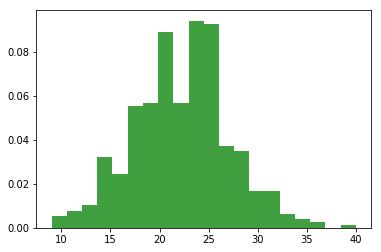

In [9]:
############################## (3) Third question:  ################################
# On average, how many communication towers are required before full coverage is obtained
field_size_x = 10 # Setting field size for the whole rectangular region
field_size_y = 10
test_num =500 # Set total window numbers that will show up
fullcover_num_record = []

for i in range(test_num):
    Occupation_matrix = np.zeros((field_size_x,field_size_y))
    #These two vectors are used to record rectangle info before trim and after trim
    x_sieve_all = np.ones((1,field_size_x)) #take out all rows
    y_sieve_all = np.ones((field_size_y,1)) # take out all columns
    fullcover_check = np.dot(np.dot(x_sieve_all,Occupation_matrix),y_sieve_all)

    # Initialize tower number count
    tower_count = 0
    while fullcover_check[0][0] != field_size_x * field_size_y:
        stop_flag = 1
        while (stop_flag): # Keep generating new windows until occupation can happen
            #Variables with extra subscript 1 means new generated window
            width_1, height_1, position_x_1, position_y_1 = window_generator(field_size_x, field_size_y)
            # Trim new generated window if necessary
            width_taken, height_taken, position_x_taken, position_y_taken = trim_func(
                        width_1, height_1, position_x_1, position_y_1, Occupation_matrix)
            if width_taken * height_taken > 0: 
                stop_flag = 0
        #Update occupation matrix
        write_occupation(width_taken, height_taken, position_x_taken, position_y_taken, 
                                 Occupation_matrix, field_size_x, field_size_y)
        fullcover_check = np.dot(np.dot(x_sieve_all,Occupation_matrix),y_sieve_all)
        #print(Occupation_matrix)
        tower_count += 1
    #print(tower_count)
    fullcover_num_record.append(tower_count)
    
#print(fullcover_num_record)
n, bins, patches = plt.hist(fullcover_num_record, 20, normed=1, facecolor='green', alpha=0.75)
np_fullcover_num_record = np.array(fullcover_num_record)
average_fullcover_num = np.sum(np_fullcover_num_record)/test_num
round_average_fullcover_num = int(round(average_fullcover_num))
print('Average number of communication towers to achieve full coverage is: ', str(average_fullcover_num))
print('which is round to ',str(round_average_fullcover_num))

### Brief Discussion of above results:

From the result shown above, we could know that when the width and height of the overall footprint are both 10 units. The average number of communication towers to achieve full coverage is about 22 which will vary with different test runs. 

### 3.4 This part of code is specialized for further discussion of our problem

Average number of communication towers to achieve full coverage is:  17.952
It costs 1 seconds to run the program when the width and height of the overall footprint are 8
Average number of communication towers to achieve full coverage is:  25.492
It costs 6 seconds to run the program when the width and height of the overall footprint are 12
Average number of communication towers to achieve full coverage is:  31.69
It costs 17 seconds to run the program when the width and height of the overall footprint are 16
Average number of communication towers to achieve full coverage is:  37.006
It costs 44 seconds to run the program when the width and height of the overall footprint are 20
Average number of communication towers to achieve full coverage is:  42.064
It costs 94 seconds to run the program when the width and height of the overall footprint are 24
Average number of communication towers to achieve full coverage is:  46.346
It costs 178 seconds to run the program when the width and heig

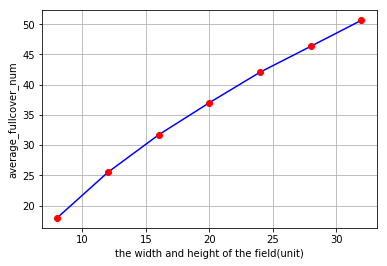

In [14]:
############################## Analysis:  ################################
# On average, how many communication towers are required before full coverage is obtained given different overall footprint
field_size = [8, 12, 16, 20, 24, 28, 32]
test_num =500 # Set total window numbers that will show up
num = []
t = []
for size in field_size:
    starttime = datetime.datetime.now()
    field_size_x = field_size_y = size
    fullcover_num_record = []

    for i in range(test_num):
        Occupation_matrix = np.zeros((field_size_x,field_size_y))
        #These two vectors are used to record rectangle info before trim and after trim
        x_sieve_all = np.ones((1,field_size_x)) #take out all rows
        y_sieve_all = np.ones((field_size_y,1)) # take out all columns
        fullcover_check = np.dot(np.dot(x_sieve_all,Occupation_matrix),y_sieve_all)

        # Initialize tower number count
        tower_count = 0
        while fullcover_check[0][0] != field_size_x * field_size_y:
            stop_flag = 1
            while (stop_flag): # Keep generating new windows until occupation can happen
                #Variables with extra subscript 1 means new generated window
                width_1, height_1, position_x_1, position_y_1 = window_generator(field_size_x, field_size_y)
                # Trim new generated window if necessary
                width_taken, height_taken, position_x_taken, position_y_taken = trim_func(
                            width_1, height_1, position_x_1, position_y_1, Occupation_matrix)
                if width_taken * height_taken > 0: 
                    stop_flag = 0
            #Update occupation matrix
            write_occupation(width_taken, height_taken, position_x_taken, position_y_taken, 
                                     Occupation_matrix, field_size_x, field_size_y)
            fullcover_check = np.dot(np.dot(x_sieve_all,Occupation_matrix),y_sieve_all)
            #print(Occupation_matrix)
            tower_count += 1
        #print(tower_count)
        fullcover_num_record.append(tower_count)

    np_fullcover_num_record = np.array(fullcover_num_record)
    average_fullcover_num = np.sum(np_fullcover_num_record)/test_num
    print('Average number of communication towers to achieve full coverage is: ', str(average_fullcover_num))
    num.append(average_fullcover_num)
    endtime = datetime.datetime.now()
    print ('It costs',(endtime - starttime).seconds,'seconds to run the program when the width and height of the overall footprint are', size)
    t.append((endtime - starttime).seconds)
    
plt.plot(field_size, num,'b',lw = 1.5) 
plt.plot(field_size, num,'ro') 
plt.grid(True)
plt.xlabel('the width and height of the field(unit)')
plt.ylabel('average_fullcover_num')
plt.show()

### Brief Discussion of above results:

Here we take whole field size from a series of square shape with dimension of 8\*8, 12\*12, 16\*16, 20\*20, 24\*24, 28\*28, 32\*32. For each case, we test 500 times to realize its full coverage, we will get average tower numbers of each case to reach full coverage. As we can see here, for larger field we will need more towers which is apparent. While the linear relation seems to be interesting here.


### 4. Trade-off and limitation details of current solution:

To guarantee an optimal maximum coverage, the scalability of the solution to large field size is thus sacrificed. As field size increasing, the unit area over total filed area will decrease. The following code will show more detailed time complexity analysis of this solution: 

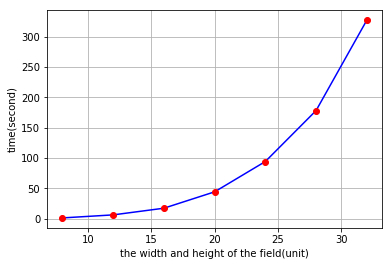

In [15]:
############################## Analysis:  ################################
# The program running time to get the average number of communication towers to achieve full coverage given different overall footprint
plt.plot(field_size, t,'b', lw = 1.5)
plt.plot(field_size, t,'ro')
plt.grid(True)
plt.xlabel('the width and height of the field(unit)')
plt.ylabel('time(second)')
plt.show()

### Brief Discussion of above results:

Due to the inherent algorithm design, the time cost will increase dramatically with increasing of field size. As field size increasing, the unit area over total filed area will decrease. It will become harder and harder for current solution to find a optimal trim, because there will be too many possibilties for this script to test. Above plot shows the time complexity of current solution. In fact, during the test, if field size is over 200 (which is not shown in above plot), it's almost impossible for whole test to finish within a short time

### 5. Another static visualization way to show communication tower sequences

As the last part, here another static visualization way is shown to give intuitive feeling about how foot prints of communications take place one by one. In attached plot, there are 3 columns of plots. The 1st column will show the state of coverage before new tower coming online. The 2nd column will show the information about new coming tower. The 3rd column will show how to trim that new coming one. There will be a order in time between plots in different rows. 

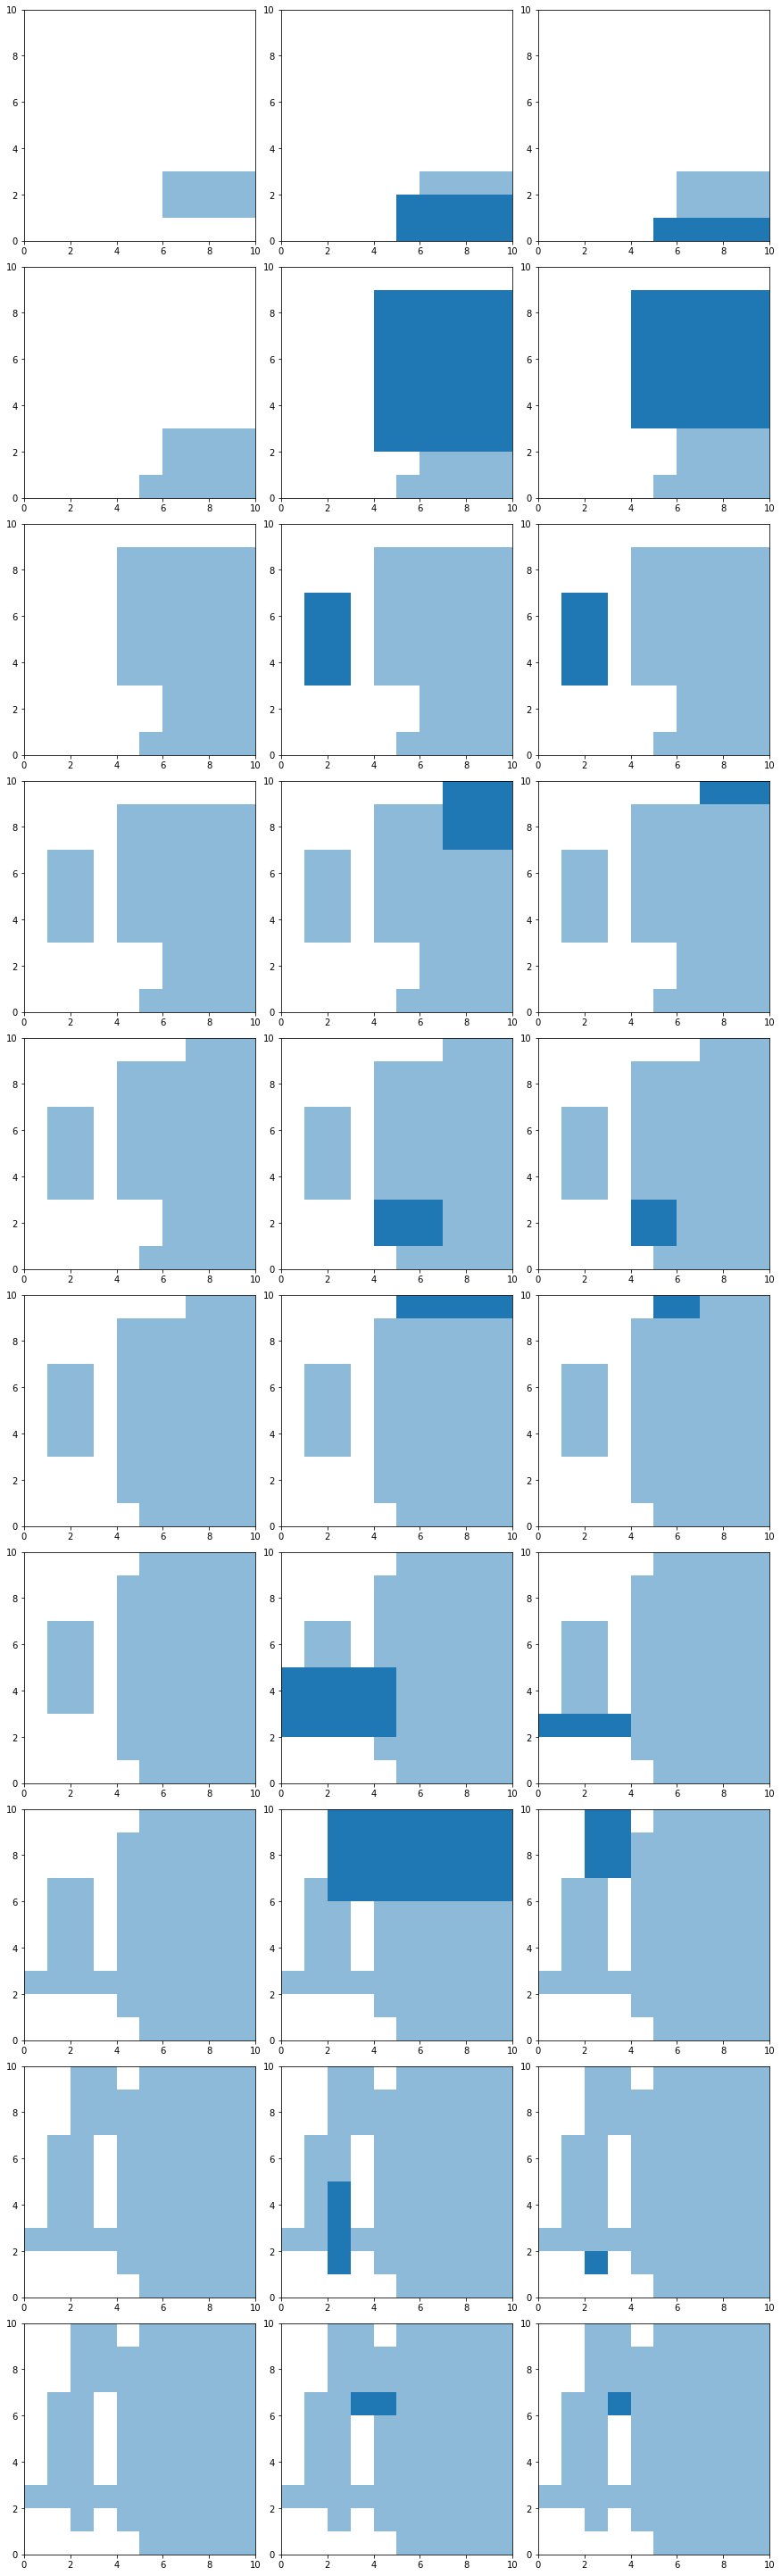

In [144]:
#### This part is used to visualize all the results in a static mode
field_size_x = 10 # Setting field size for the whole rectangular region
field_size_y = 10
step_num =10 # Set total window numbers that will show up
rect_records_untrimed, rect_records, Occupation_matrix = windows_generator(field_size_x, field_size_y, step_num)

fig = plt.figure(figsize=(4*step_num,4*step_num)) #Set whole figure size (width, height)
interval = 1/step_num

for i in range(step_num):
    # State before new window come in
    ax=fig.add_axes([0., 1.0-interval*(i+1), interval*0.9, interval*0.9, ])
    ax.set_xlim([0,field_size_x]) 
    ax.set_ylim([0,field_size_y])
    for j in range(i+1):
        ax.add_patch(patches.Rectangle((rect_records[j][2],rect_records[j][3]),  rect_records[j][0], rect_records[j][1], alpha =0.5))
    
    # State after new window come in but before trim happens
    ax=fig.add_axes([interval, 1.0-interval*(i+1), interval*0.9, interval*0.9, ])
    ax.set_xlim([0,field_size_x]) 
    ax.set_ylim([0,field_size_y])
    #ax.add_patch(patches.Rectangle((position_x,position_y),  width, height, alpha =0.5))
    for j in range(i+1):
        ax.add_patch(patches.Rectangle((rect_records[j][2],rect_records[j][3]),  rect_records[j][0], rect_records[j][1], alpha =0.5))
    ax.add_patch(patches.Rectangle((rect_records_untrimed[i+1][2],rect_records_untrimed[i+1][3]),  
                                 rect_records_untrimed[i+1][0], rect_records_untrimed[i+1][1], alpha =None))
    
    # State after trim take place
    #ax = fig.add_subplot(i+1,3,3)
    ax=fig.add_axes([interval*2, 1.0-interval*(i+1), interval*0.9, interval*0.9, ])
    ax.set_xlim([0,field_size_x]) 
    ax.set_ylim([0,field_size_y])
    #ax.add_patch(patches.Rectangle((position_x,position_y),  width, height, alpha =0.5))
    for j in range(i+1):
        ax.add_patch(patches.Rectangle((rect_records[j][2],rect_records[j][3]),  rect_records[j][0], rect_records[j][1], alpha =0.5))
    ax.add_patch(patches.Rectangle((rect_records[i+1][2],rect_records[i+1][3]),  rect_records[i+1][0], rect_records[i+1][1], alpha =None))
    #ax.add_patch(patches.Rectangle((position_x_taken,position_y_taken),  width_taken, height_taken, alpha =None))

plt.show()

### 6. Conclusion:

A linear algebra based method is proposed to solve this problem. Although its limitation at large field size is apparent, its performance within small field sizes (e.g. <30) is perfect. An optimal maximum coverage can always be guaranteed. Also, it is reasonable to believe that there is still room to improve this solution to even better performance.